## 1-2 ) Chargement du dataset et Nettoyage

In [3]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
#df['MedHouseVal'] = ds.target

if df.isnull().values.any():
    # Imputation des valeurs manquantes (par la moyenne)
    df.fillna(df.mean(), inplace=True)
else:
    print("Aucune valeur manquante. Rien à faire.")

df.head(10)




Aucune valeur manquante. Rien à faire.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


## 3 ) EDA

Statistiques descriptives

In [ ]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

Histogrammes :

Histogrammes :




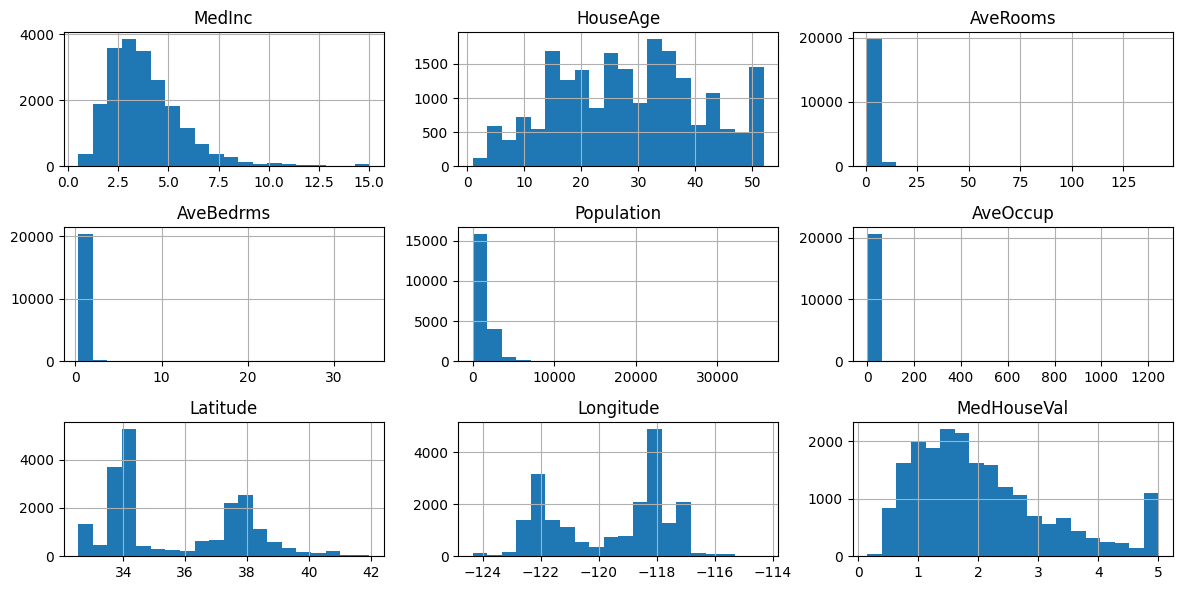

In [6]:
import matplotlib.pyplot as plt

print('Histogrammes :')
print('\n')
df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

BoxPlots:

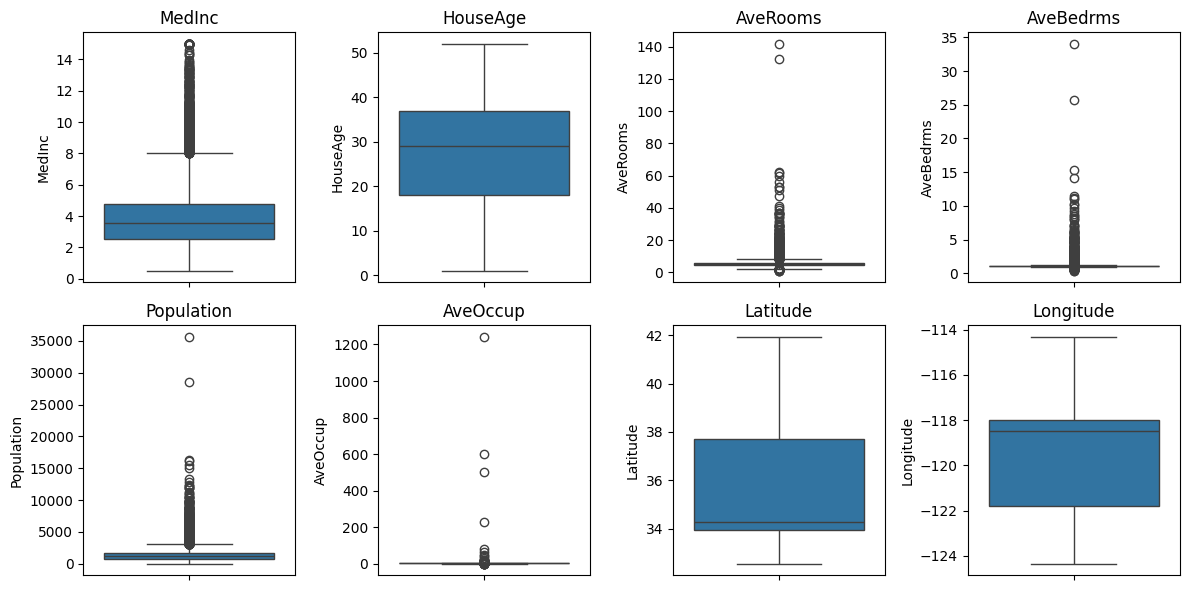

In [7]:
import seaborn as sns


# Liste des donnés (sans la cible)
df["MedHouseVal"] = ds.target
features = df.drop(columns=["MedHouseVal"]).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Scatter-plots  MedHouseVal vs variables clés

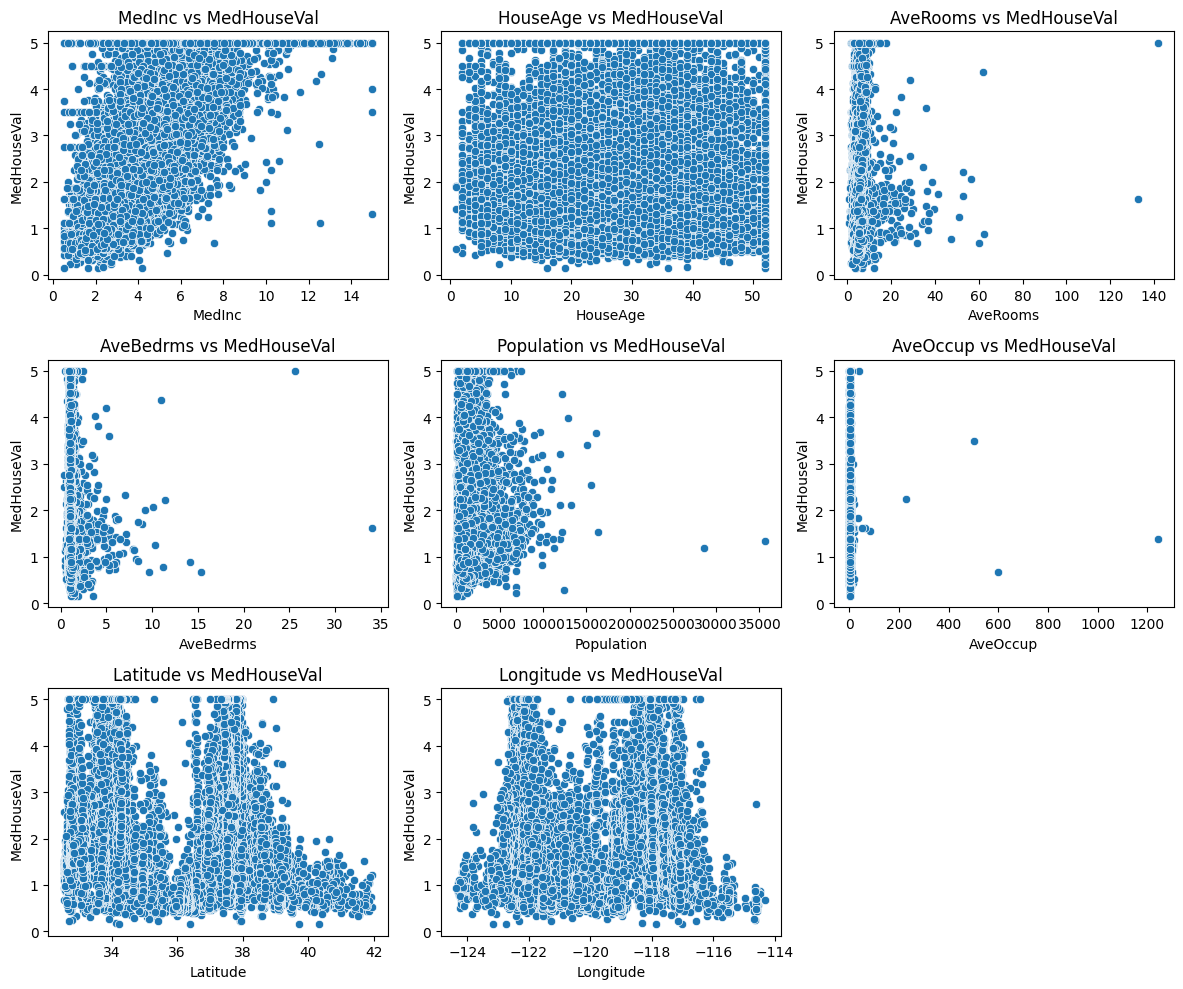

In [8]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df["MedHouseVal"])
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.title(f"{col} vs MedHouseVal")


plt.tight_layout()
plt.show()

Matrice de corrélation

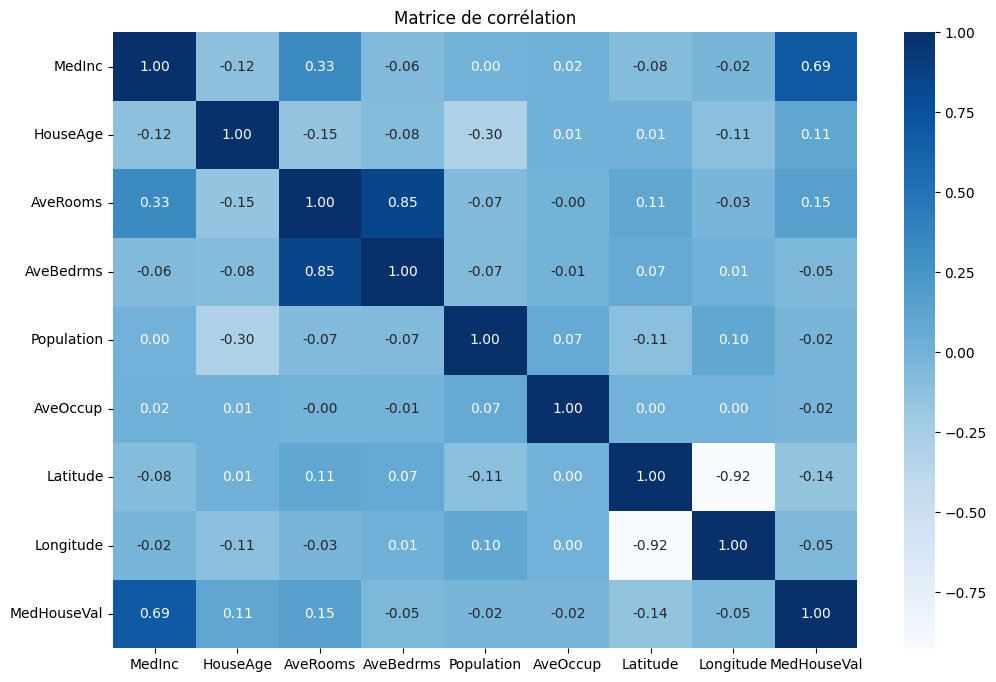

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

## 4 ) Fractionnement des données (train/validation/test)

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# 80% pour train+validation, 20% pour test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=0
    # 0.25 car 20% c'est 25% de 80%
)

#100% total
#├── 80% trainval
#│   ├── 60% train       (75% de 80%)
#│   └── 20% validation  (25% de 80%)
#└── 20% test

print("Train :", X_train.shape)
print("Validation :", X_val.shape)
print("Test :", X_test.shape)

Train : (12384, 8)
Validation : (4128, 8)
Test : (4128, 8)


## 5 ) Feature engineering / sélection

Normalisation avec StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normaliser sur X_train uniquement
scaler.fit(X_train)

# Appliquer la normalisation aux 3 fractions
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Remettre sous forme de DataFrame pour plus de lisibilité
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


X_train_scaled.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.605195,-0.755516,0.330310,-0.398132,-0.148035,0.045331,1.001530,-0.956616
1,-0.876040,1.468697,0.181058,0.097845,-0.765052,-0.196386,0.945510,-0.722582
2,-1.377854,-1.391005,-0.733148,0.252456,1.228250,0.117023,-1.369982,1.224378
3,0.102908,-1.470441,0.238547,0.081784,1.072663,0.032943,-0.749094,0.955488
4,-0.945304,-0.755516,-0.550487,-0.004502,1.435405,-0.020543,-1.318630,1.294090


## 6 ) Baseline et modélisation initiale

Créer et entraîner le modèle de regression linéaire

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

Evaluer les rapports en MSE, MAE, R² sur le set de validation.

In [13]:
# Prédictions sur les données de validation
y_pred_val = model.predict(X_val_scaled)

# Calcul des erreurs
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2_linear = r2_score(y_val, y_pred_val)

print("Résultats: Linear Regression ")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2_linear:.4f}")

Résultats: Régression linéaire (validation set)
MSE : 0.5615
MAE : 0.5341
R²  : 0.5839


## 7 ) Régularisation : Ridge et Lasso

In [14]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

# Entraîner les modèles
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de validation
y_pred_ridge = ridge.predict(X_val_scaled)
y_pred_lasso = lasso.predict(X_val_scaled)

# Évaluer les modèles
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("\nRésultats: Ridge Regression")
print(f"MSE : {mse_ridge:.4f}")
print(f"MAE : {mae_ridge:.4f}")
print(f"R²  : {r2_ridge:.4f}")

print("\nRésultats: Lasso Regression")
print(f"MSE : {mse_lasso:.4f}")
print(f"MAE : {mae_lasso:.4f}")
print(f"R²  : {r2_lasso:.4f}")



Résultats: Ridge Regression
MSE : 0.5615
MAE : 0.5341
R²  : 0.5840

Résultats: Lasso Regression
MSE : 0.5509
MAE : 0.5371
R²  : 0.5918


## 8 ) Évaluation finale

Application du meilleur modèle sur le test set

In [15]:
# Comparer les modèles en fonction de R2
best_model = None
best_r2 = -float('inf')
model_name = ""

if r2_linear > best_r2:
    best_r2 = r2_linear
    best_model = model
    model_name = "Linear Regression"

if r2_ridge > best_r2:
    best_r2 = r2_ridge
    best_model = ridge
    model_name = "Ridge Regression"

if r2_lasso > best_r2:
    best_r2 = r2_lasso
    best_model = lasso
    model_name = "Lasso Regression"


# Evaluation du meilleur modèle sur le test set
y_pred_test = best_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nRésultats: {model_name} (test set)")
print(f"MSE : {mse_test:.4f}")
print(f"MAE : {mae_test:.4f}")
print(f"R²  : {r2_test:.4f}")


Résultats: Lasso Regression (test set)
MSE : 0.5364
MAE : 0.5367
R²  : 0.5886


Intervalle de confiance

In [16]:
import numpy as np
from scipy import stats

# Intervalle de confiance à 95%
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


residuals = y_test - y_pred_test

mean_res, lower_bound, upper_bound = confidence_interval(residuals)

print(f"\nIntervalle de confiance à 95% :")
print(f"Moyenne des résidus : {mean_res:.4f}")
print(f"Intervalle : [{lower_bound:.4f}, {upper_bound:.4f}]")



Intervalle de confiance à 95% pour la moyenne des résidus:
Moyenne des résidus : -0.0111
Intervalle : [-0.0334, 0.0112]
